In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/home/kcdh/miniconda3/envs/hanish/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
# %% Load and visualise the images
image_paths = [
    'data_balanced/train/Erythroleukoplakia/4_DSCN3185.jpg', #Erythroleukoplakia
    'data_balanced/train/Leukoplakia/8_20170809_184714.jpg',#Leukoplakia
    'data_balanced/train/Tumor/19_DSCN7076.jpg', #Tumor
    'data_balanced/train/Ulcer/57_20150430_174738.jpg', #Ulcer 
    ]
images = []
for path in image_paths:
    images.append(Image.open(path))

In [7]:
images[0].size, images[1].size

((1046, 1055), (556, 878))

In [9]:
def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

grid = image_grid(images, cols=3)
# display(grid)

In [10]:
# %% Zero-shot classification
classes = ['Erythroleukoplakia', 'Leukoplakia', 'Tumor', 'teddybear', 'Ulcer', 'Lesion']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

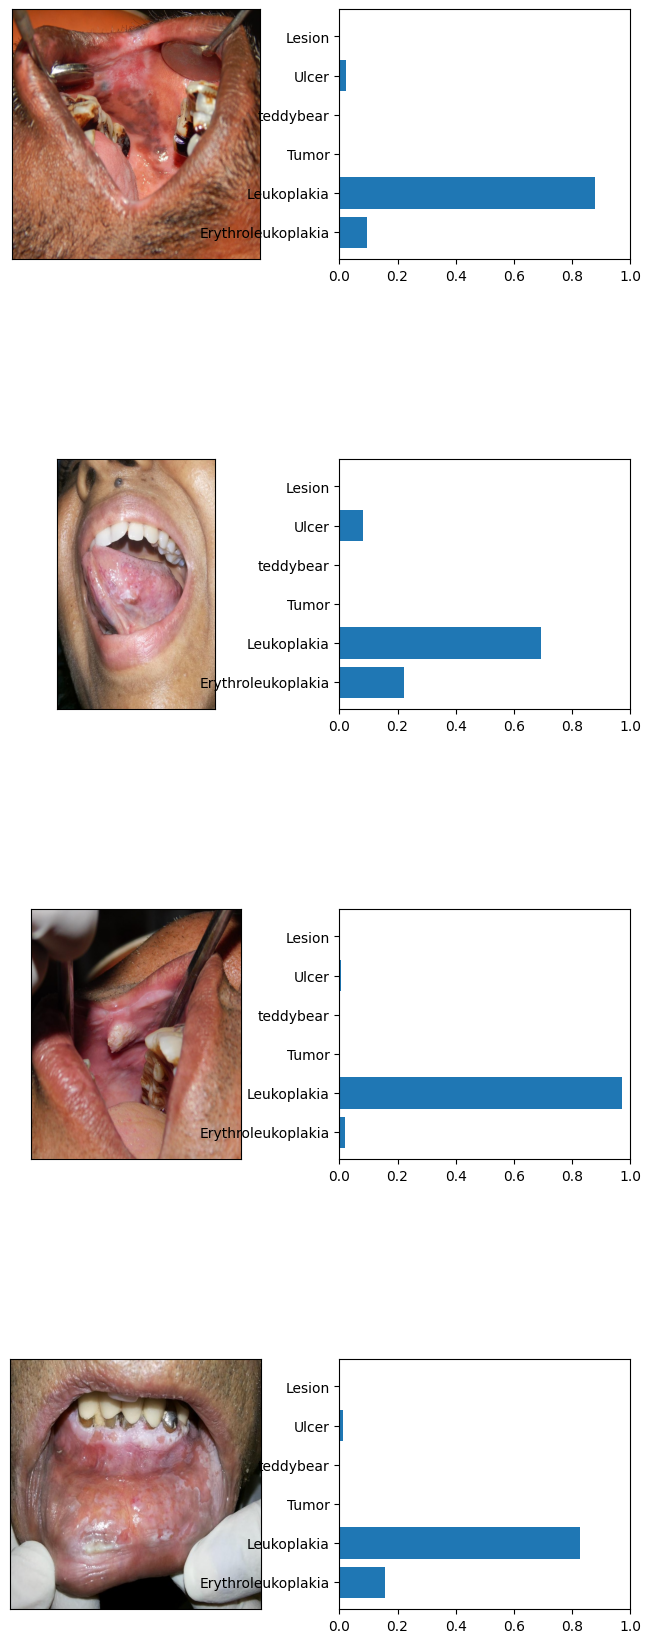

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()
